<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JPM_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-13 09:27:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.28.138, 74.125.28.113, 74.125.28.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.28.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c8c1t8b075ke5osr06ev81lstio2bobc/1673602050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=78876fdd-c949-44c8-828f-386e31ededb9 [following]
--2023-01-13 09:27:41--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c8c1t8b075ke5osr06ev81lstio2bobc/1673602050000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=78876fdd-c949-44c8-828f-386e31ededb9
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to doc-0k-9o

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JPM_2008_Q2_20080717發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
2,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
3,Co.,0.0,0.0,proper noun,conjunct,False,False,False,False
4,(,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
13316,quarter,0.0,0.0,noun,object of preposition,True,False,False,False
13317,.,0.0,0.0,punctuation,punctuation,False,False,True,False
13318,Take,0.0,0.0,verb,root,True,True,False,False
13319,care,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          13321 non-null  object 
 1   Polarity      13321 non-null  float64
 2   Subjectivity  13321 non-null  float64
 3   Pos_          13321 non-null  object 
 4   Dep_          13294 non-null  object 
 5   Alpha         13321 non-null  bool   
 6   Stopword      13321 non-null  bool   
 7   Punct         13321 non-null  bool   
 8   Num           13321 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 572.5+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
5,NYSE,0.0,0.0,proper noun,appositional modifier,True,False,False,False
7,JPM,0.0,0.0,proper noun,appositional modifier,True,False,False,False
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13309,joining,0.0,0.0,verb,complement of preposition,True,False,False,False
13312,Look,0.0,0.0,verb,root,True,False,False,False
13313,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
13316,quarter,0.0,0.0,noun,object of preposition,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
11,Earnings,0.0,0.0,noun,compound,True,False,False,False
71,morning,0.0,0.0,noun,appositional modifier,True,False,False,False
73,ladies,0.0,0.0,noun,conjunct,True,False,False,False
75,gentlemen,0.0,0.0,noun,conjunct,True,False,False,False
77,Welcome,0.8,0.9,interjection,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13309,joining,0.0,0.0,verb,complement of preposition,True,False,False,False
13312,Look,0.0,0.0,verb,root,True,False,False,False
13313,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
13316,quarter,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
77,Welcome,0.8,0.9,interjection,root,True,False,False,False
94,contain,0.0,0.0,verb,root,True,False,False,False
95,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False
97,looking,0.0,0.0,verb,adjectival modifier,True,False,False,False
98,statements,0.0,0.0,noun,direct object,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13301,expect,0.0,0.0,verb,adverbial clause modifier,True,False,False,False
13303,Thank,0.0,0.0,verb,root,True,False,False,False
13312,Look,0.0,0.0,verb,root,True,False,False,False
13313,forward,0.0,0.0,adverb,adverbial modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
77,Welcome,0.8,0.900000,interjection,root,True,False,False,False
95,forward,0.0,0.000000,adverb,adverbial modifier,True,False,False,False
97,looking,0.0,0.000000,verb,adjectival modifier,True,False,False,False
113,forward,0.0,0.000000,adverb,adverbial modifier,True,False,False,False
115,looking,0.0,0.000000,verb,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13235,know,0.0,0.000000,verb,parataxis,True,False,False,False
13243,possibly,0.0,1.000000,adverb,adverbial modifier,True,False,False,False
13291,possible,0.0,1.000000,adjective,adjectival complement,True,False,False,False
13297,bad,-0.7,0.666667,adjective,adjectival complement,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    943.000000
mean       0.060465
std        0.236458
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.062500
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    943.000000
mean       0.304894
std        0.338312
min        0.000000
25%        0.000000
50%        0.166667
75%        0.535714
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
77,Welcome,0.8,0.900000,interjection,root,True,False,False,False,Positive,Subjective
95,forward,0.0,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
97,looking,0.0,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
113,forward,0.0,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
115,looking,0.0,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
...,...,...,...,...,...,...,...,...,...,...,...
13235,know,0.0,0.000000,verb,parataxis,True,False,False,False,Neutral,Objective
13243,possibly,0.0,1.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Subjective
13291,possible,0.0,1.000000,adjective,adjectival complement,True,False,False,False,Neutral,Subjective
13297,bad,-0.7,0.666667,adjective,adjectival complement,True,False,False,False,Negative,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Objective,3
1,Negative,Subjective,110
2,Neutral,Objective,433
3,Neutral,Subjective,156
4,Positive,Subjective,241


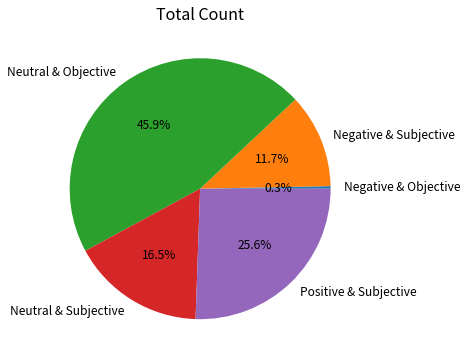

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

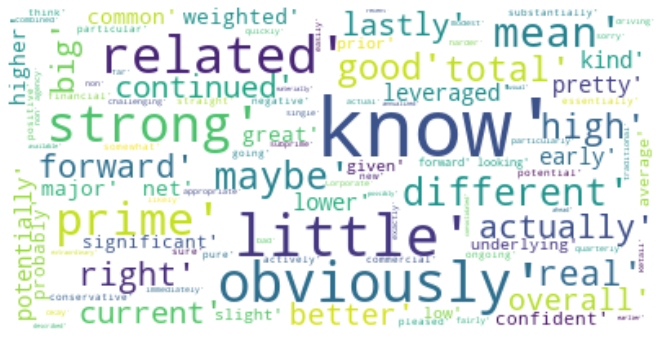

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,JPMorgan Chase & Co. (NYSE:JPM) Q2 2008 Earnin...,0.000000,0.000000
1,Welcome to the JPMorgan Chase second quarter 2...,0.400000,0.450000
2,(Operator Instructions)Today's presentation ma...,0.000000,0.375000
3,Any forward-looking statements reflect managem...,0.000000,0.700000
4,"In addition, such statements are, by their nat...",0.001389,0.451389
...,...,...,...
481,Ron Mandel - GICSo you don't really have enoug...,0.100000,0.350000
482,Michael J. CavanaghBut it's possible that they...,-0.350000,0.833333
483,"Thank you, everybody, for joining us.",0.000000,0.000000
484,Look forward to next quarter.,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    486.000000
mean       0.072923
std        0.216484
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.166667
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    486.000000
mean       0.338583
std        0.294089
min        0.000000
25%        0.000000
50%        0.346296
75%        0.519048
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,JPMorgan Chase & Co. (NYSE:JPM) Q2 2008 Earnin...,0.000000,0.000000,Neutral,Objective
1,Welcome to the JPMorgan Chase second quarter 2...,0.400000,0.450000,Positive,Subjective
2,(Operator Instructions)Today's presentation ma...,0.000000,0.375000,Neutral,Subjective
3,Any forward-looking statements reflect managem...,0.000000,0.700000,Neutral,Subjective
4,"In addition, such statements are, by their nat...",0.001389,0.451389,Positive,Subjective
...,...,...,...,...,...
481,Ron Mandel - GICSo you don't really have enoug...,0.100000,0.350000,Positive,Subjective
482,Michael J. CavanaghBut it's possible that they...,-0.350000,0.833333,Negative,Subjective
483,"Thank you, everybody, for joining us.",0.000000,0.000000,Neutral,Objective
484,Look forward to next quarter.,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,97
2,Neutral,Objective,139
3,Neutral,Subjective,50
4,Positive,Objective,1
5,Positive,Subjective,198


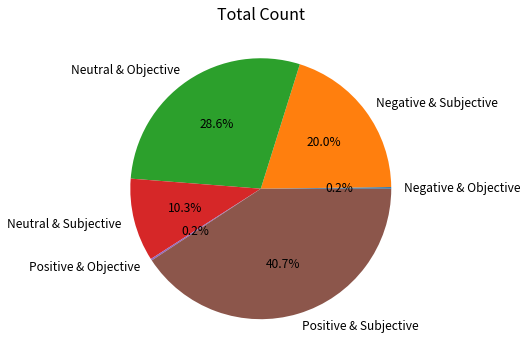

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)The firm's SEC filings and such slides are available at the firm's website.

2)We talked about that being possibly as much as $1 billion in May, down from our earlier estimates, so obviously it deteriorated a bit from where we expected to be in May, but for the same reasons we described there at the time we gave the guidance in May.

3)And that compares with $500 million after tax that we had expected or talked about at the time of our last update in mid-May.

4)And that, again, breaks down into two pieces, equity pickup for the shares we owned for the month pre the close of $420 million and other merger-related items, I think merger expenses and other things, of $117 million after tax.

5)If you think about it, we talked also at last update about merger costs and merger-related expenses that continue past this quarter.

6)I can think of it being maybe up to $150 million after tax or so per quarter for the second half of the year and then trend down over time beyond that in '09 and a

In [ ]:
#查看'Negative','Objective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)It just makes it harder, that's all.



In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)(Operator Instructions)Today's presentation may contain forward-looking statements within the meaning of the Private Securities Litigation Reform Act of 1995.

2)Any forward-looking statements reflect management's current beliefs and speak only as of the date hereof.

3)The next big item is just merger-related items that run through the operating results of the company for the quarter, which totaled $540 million, and we're putting all of those in Corporate.

4)So those are the above the line items of $540 million that's Bear Stearns related.

5)And then the last point is just the geography of all this.

6)As I said, we put the merger-related expenses for the quarter and in the future go in Corporate, but the ongoing activities, that $1 billion of earnings that we'll ramp up to, will appear in the Investment Bank and Asset Management business where the Bear Stearns businesses went.

7)So to sum up, at the bottom what it all means in terms of financial impact, the total income of the c

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)JPMorgan Chase & Co. (NYSE:JPM) Q2 2008 Earnings Call July 17, 2008 8:00 AM ETExecutivesMichael J. Cavanagh - Chief Financial OfficerJames Dimon - Chairman of the Board, President, Chief Executive OfficerAnalystsGlenn Schorr - UBSGuy Moszkowski - Merrill LynchMike Mayo - Deutsche BankBetsy Graseck - Morgan StanleyWilliam Tanona - Goldman Sachs Jeff Hart - Sandler O’NeillMeredith Whitney - OppenheimerJohn McDonald - AllianceBernsteinRon Mandel - GICOperatorGood morning, ladies and gentlemen.

2)Today's presentation may also reference non-GAAP financial measures, and you should refer to the information contained in the written slides accompanying this presentation for information about their calculation.

3)At the conclusion of the presentation, you'll have the opportunity to ask questions.

4)(Operator Instructions)At this time I'd like to turn the call over to JPMorgan Chase's Chairman and Chief Executive Officer, Jamie Dimon, and Chief Financial Officer, Mike Cavanagh.

5)Mr. Cavana

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Welcome to the JPMorgan Chase second quarter 2008 earnings call.

2)In addition, such statements are, by their nature, subject to significant risks and uncertainties and the firm's actual returns may differ materially from those described in such forward-looking statements.

3)Please refer to JPMorgan Chase's filings with the Securities and Exchange Commission, including its most recent Form 10K and Form 10Q for a description of the risks and factors that could cause the firm's results to differ materially from those described in the forward-looking statements.

4)We're going to do the usual, so you've got a presentation available to you on our website that I will walk through, through all the businesses, and then Jamie and I'll take some Q&A.So if you go to the presentation, I just want to start right off the bat on Page 1.

5)For the sake of clarity throughout all the numbers, just explain right upfront how the accounting for the Bear Stearns acquisition, which closed during the qu

In [ ]:
#查看'Positive','Objective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Objective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)You know, we already got rid of double-cycle billing and we already got rid of [offers] default pricing or [offers] repricing at all.



#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

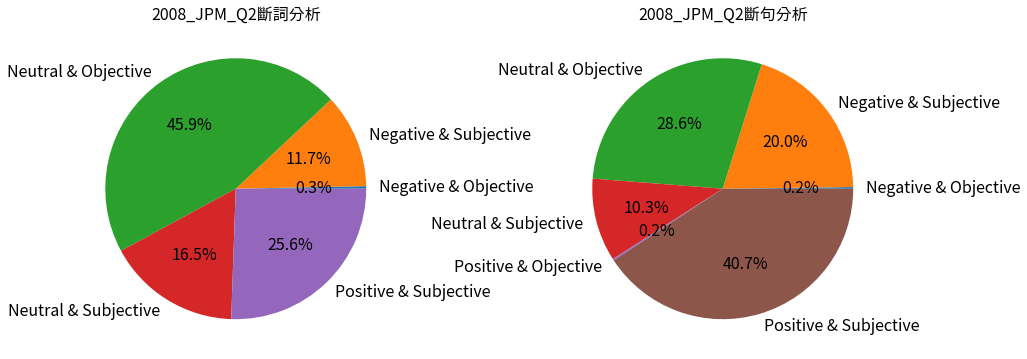

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
label2 = ["Negative & Objective", "Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Objective", "Positive & Subjective"]


axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JPM_Q2斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JPM_Q2斷句分析', fontsize=16)


plt.savefig("2008_JPM_Q2.png")
from google.colab import files
files.download("2008_JPM_Q2.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
